In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm  
import numpy as np
from scipy.stats import lognorm
import numpy.random as ra

np.set_printoptions(threshold=np.nan)


In [3]:
gas_prices = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/fuel_wholesale_price/EIA-STEO_NGSPUUK_M (1).csv')
gas_prices.head()

,Date,Value
0,2017-12-31,7.618882
1,2017-11-30,7.897095
2,2017-10-31,7.138350
3,2017-09-30,6.770626
4,2017-08-31,6.334714


In [4]:
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'])
gas_prices.head()

,Date,Value
0,2017-12-31,7.618882
1,2017-11-30,7.897095
2,2017-10-31,7.138350
3,2017-09-30,6.770626
4,2017-08-31,6.334714


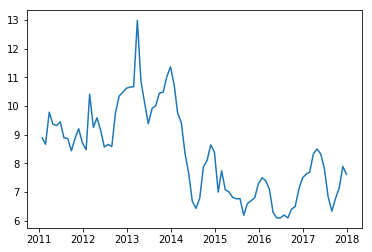

In [5]:
plt.plot(gas_prices.Date, gas_prices.Value)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1026a5198>]],
      dtype=object)

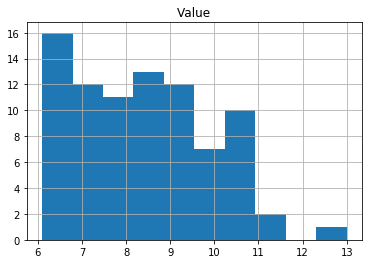

In [6]:
gas_prices.hist()

Standard deviation for each year

In [7]:
gas_prices_group = gas_prices.groupby(gas_prices.Date.dt.year)
gas_prices_group.std()

,Value
Date,
2011,0.386908
2012,0.824890
2013,0.909880
2014,1.292635
2015,0.382562
2016,0.580687
2017,0.681188


In [8]:
gas_prices_group.std()

,Value
Date,
2011,0.386908
2012,0.824890
2013,0.909880
2014,1.292635
2015,0.382562
2016,0.580687
2017,0.681188


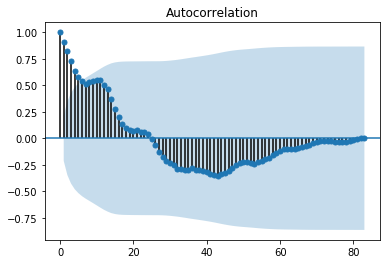

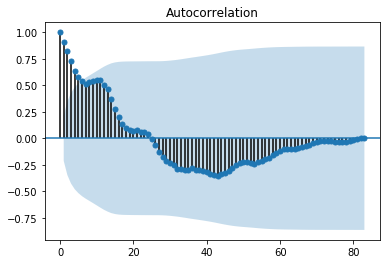

In [9]:
plot_acf(gas_prices['Value'])

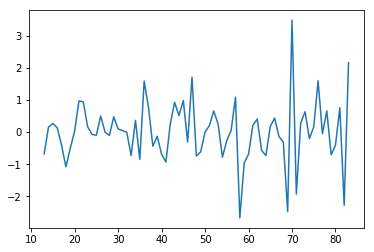

In [10]:
gas_prices['diff_1'] = gas_prices.Value.diff().diff(periods=12)
gas_prices
plt.plot(gas_prices['diff_1'])
gas_prices = gas_prices.dropna()

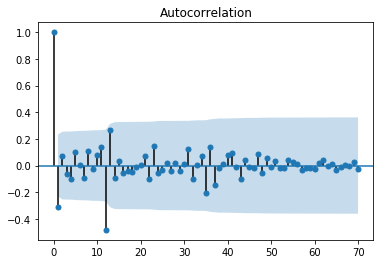

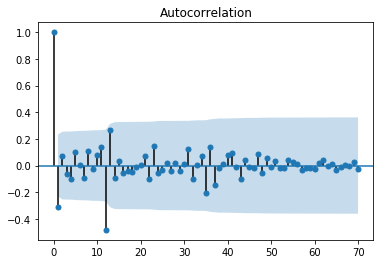

In [11]:
plot_acf(gas_prices['diff_1'])

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


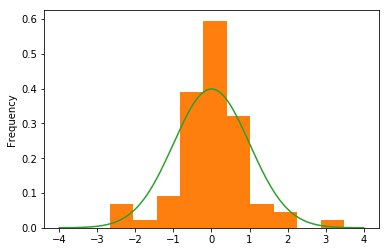

In [12]:
gas_prices.diff_1.plot(kind='hist', normed=True)
gas_prices.diff_1.plot(kind='hist', density=True)
range = np.arange(-4, 4, 0.001)
plt.plot(range, norm.pdf(range,0,1))


In [123]:
count, division = np.histogram(gas_prices.diff_1, bins=20)
count, division


(array([ 2,  1,  1,  0,  0,  4, 10,  7, 13, 13,  8,  6,  1,  2,  1,  1,  0,
         0,  0,  1]),
 array([-2.67136237, -2.36374281, -2.05612326, -1.7485037 , -1.44088415,
        -1.13326459, -0.82564504, -0.51802548, -0.21040593,  0.09721363,
         0.40483318,  0.71245274,  1.0200723 ,  1.32769185,  1.63531141,
         1.94293096,  2.25055052,  2.55817007,  2.86578963,  3.17340918,
         3.48102874]))

In [114]:
count/sum(count)

array([0.04225352, 0.01408451, 0.05633803, 0.23943662, 0.36619718,
       0.1971831 , 0.04225352, 0.02816901, 0.        , 0.01408451])

In [71]:
prob = count/sum(count)
cum_prob = np.cumsum(prob)
cum_prob

array([0.04225352, 0.05633803, 0.11267606, 0.35211268, 0.71830986,
       0.91549296, 0.95774648, 0.98591549, 0.98591549, 1.        ])

<BarContainer object of 10 artists>

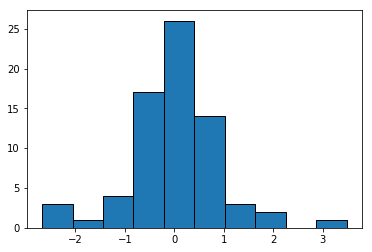

In [72]:
fig, ax = plt.subplots()
ax.bar(division[:-1], count, width=np.diff(division), ec="k", align="edge")

<BarContainer object of 10 artists>

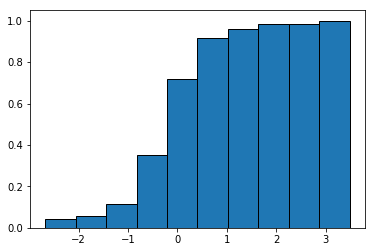

In [73]:
fig, ax = plt.subplots()
ax.bar(division[:-1], cum_prob, width=np.diff(division), ec="k", align="edge")


In [113]:
N = 10000
R = ra.uniform(0, 1, N)
count_array = division
cum_prob_array = cum_prob
count_array
gen_points = [count_array[np.argwhere(cum_prob_array == min(cum_prob_array[(cum_prob_array - r) > 0]))][0][0] for r in R]
generated_points = pd.Series(gen_points)
[[x,gen_points.count(x)] for x in set(gen_points)]


[[-0.21040592547999948, 3625],
 [-0.8256450359099992, 2449],
 [0.4048331849500002, 1941],
 [1.0200722953800003, 376],
 [1.6353114058099996, 287],
 [2.86578962667, 130],
 [-2.6713623671999986, 425],
 [-2.056123256769999, 148],
 [-1.440884146339999, 619]]

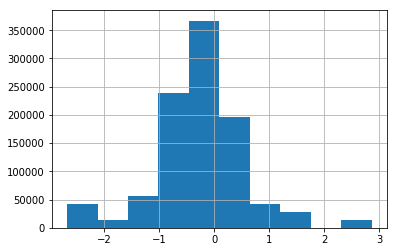

In [111]:
generated_points = pd.Series(gen_points)
generated_points.hist()

In [14]:
gas_prices['diff_1'].std()

0.9678526811662029